In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [5]:
from tensorflow.keras.datasets import fashion_mnist

In [12]:
# load the dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 7us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 3s 1us/step


In [16]:
# normalizing pixels
x_train, x_test = x_train / 255.0, x_test / 255.0

In [19]:
# reshape for cnn
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [22]:
# building the CNN model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])   

C:\Users\stanl\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
# compiling the model
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [28]:
# model training
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 16ms/step - accuracy: 0.7651 - loss: 0.6532 - val_accuracy: 0.8600 - val_loss: 0.3823
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.8816 - loss: 0.3251 - val_accuracy: 0.8812 - val_loss: 0.3281
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 14ms/step - accuracy: 0.8990 - loss: 0.2759 - val_accuracy: 0.8879 - val_loss: 0.3034
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 50s 19ms/step - accuracy: 0.9090 - loss: 0.2483 - val_accuracy: 0.8986 - val_loss: 0.2744
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 18ms/step - accuracy: 0.9209 - loss: 0.2169 - val_accuracy: 0.9063 - val_loss: 0.2611


In [31]:
# model evaluation
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {accuracy:4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9084 - loss: 0.2655
Test accuracy: 0.906300


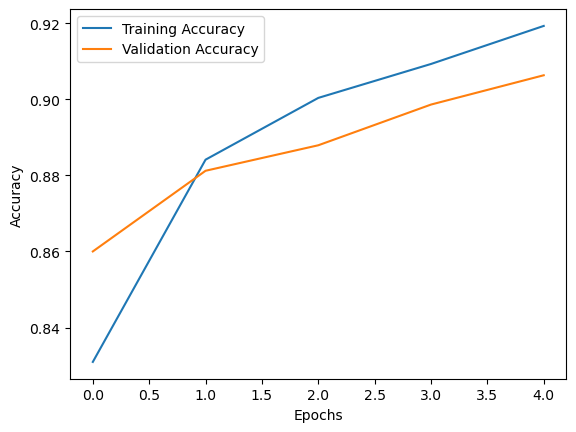

In [34]:
# plotting training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [43]:
# label representation
# 0 - T-shirt/top
# 1 - Trouser
# 2 - Pullover
# 3 - Dress
# 4 - Coat
# 5 - Sandal
# 6 - Shirt
# 7 - Sneaker
# 8 - Bag
# 9 - Ankle boot

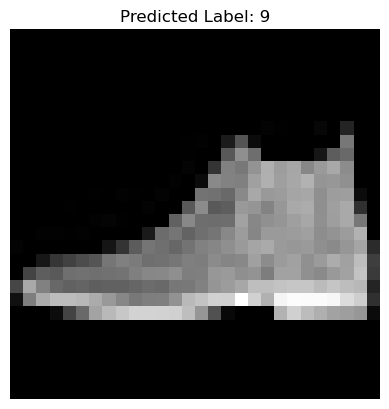

In [41]:
# now let us see what the first test image is

plt.imshow(x_test[0].reshape(28, 28), cmap="gray")
plt.title(f"Predicted Label: {predictions[0].argmax()}")
plt.axis("off")
plt.show()


In [38]:
# make predictions
predictions = model.predict(x_test)
print("Predicted label for first test image:", predictions[0].argmax())

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
Predicted label for first test image: 9


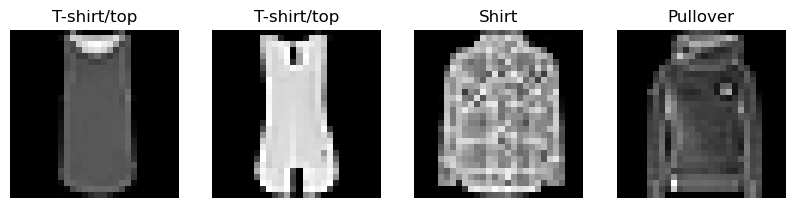

In [45]:
# in this case, i'll try to find the 3rd, 5th, 33rd, 33th images in the MNIST dataset
# Define class names
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", 
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# Choose specific indices
indices = [2, 4, 32, 54]  # Remember, Python indexing starts at 0, so 3rd = index 2, 5th = index 4, etc.

# Plot the selected images
plt.figure(figsize=(10, 5))
for i, idx in enumerate(indices):
    plt.subplot(1, len(indices), i + 1)
    plt.imshow(x_train[idx], cmap='gray')
    plt.title(class_names[y_train[idx]])
    plt.axis('off')
plt.show()